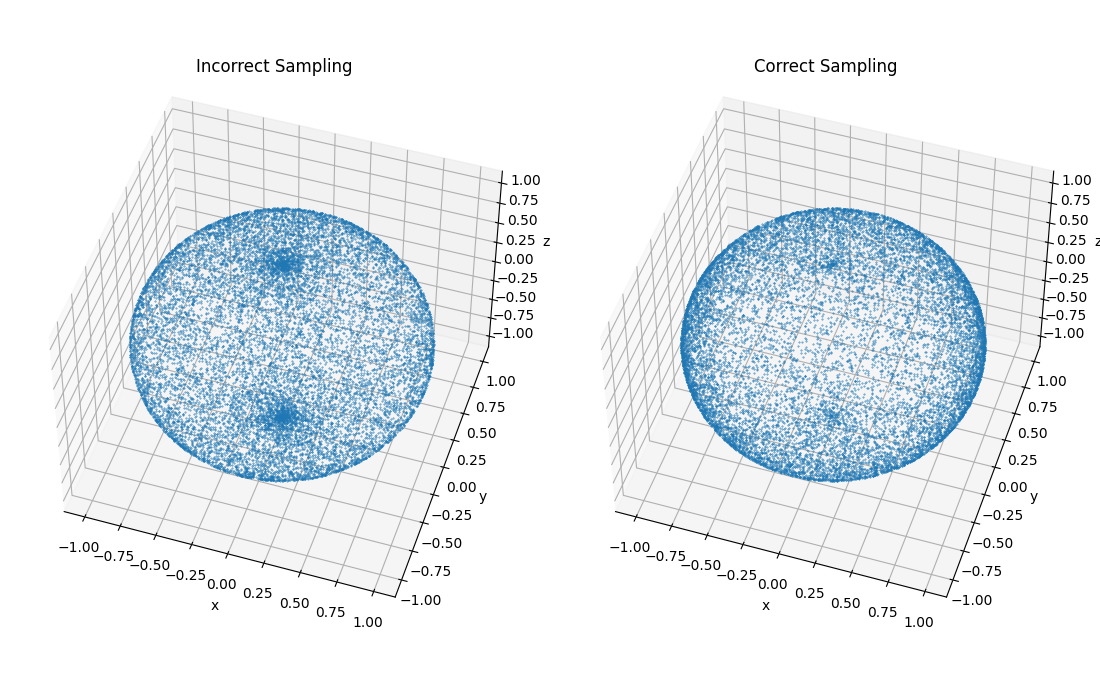

In [19]:
"""surface_sampling_sphere.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
from matplotlib.markers import MarkerStyle

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def plot_incorrect(ax: Axes) -> None:
    num_samples = 15000

    u: NDArray[np.float_] = random.rand(num_samples) * np.pi  # poloidal angle
    v: NDArray[np.float_] = random.rand(num_samples) * 2 * np.pi  # toroidal angle

    x: NDArray[np.float_] = np.array(np.sin(u) * np.sin(v), dtype=np.float_)
    y: NDArray[np.float_] = np.array(np.sin(u) * np.cos(v), dtype=np.float_)
    z: NDArray[np.float_] = np.cos(u)

    ax.set_title("Incorrect Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")  # type: ignore

    ax.view_init(azim=-72, elev=48)  # type: ignore

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, z, marker=MarkerStyle("."), s=pixel_size, depthshade=False)  # type: ignore


def plot_correct(ax: Axes) -> None:
    num_samples = 15000

    # TODO: Fix this next line
    # u: NDArray[np.float_] = random.rand(num_samples) * np.pi   # poloidal angle
    x: NDArray[np.float_] = np.linspace(0, 2.525, num_samples)
    u: NDArray[np.float_] = .5 * np.tan(x - 1.264) + np.pi / 2  # poloidal angle

    # the following is an alternative that does not work as well
    '''
    x: NDArray[np.float_] = np.linspace(0, 2 * np.power( np.pi / 2 , 1/3 ) , num_samples)
    u: NDArray[np.float_] = np.power( x - np.power( np.pi / 2 , 1/3 ) , 3) + np.pi / 2  # poloidal angle
    '''

    v: NDArray[np.float_] = random.rand(num_samples) * 2 * np.pi  # toroidal angle 

    x: NDArray[np.float_] = np.array(np.sin(u) * np.sin(v), dtype=np.float_)
    y: NDArray[np.float_] = np.array(np.sin(u) * np.cos(v), dtype=np.float_)
    z = np.cos(u)

    ax.set_title("Correct Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")  # type: ignore

    ax.view_init(azim=-72, elev=48)  # type: ignore

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, z, marker=MarkerStyle("."), s=pixel_size, depthshade=False)  # type: ignore


def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize=((11, 7)), constrained_layout=True)
    plot_incorrect(plt.subplot(121, projection="3d"))
    plot_correct(plt.subplot(122, projection="3d"))
    plt.show()


main()

The problem in this process is similar to the circle, but two fold. in order to fix this we must take all the random poloidal angles and squish them away from the end points (0 and $\pi$) and towards the center (0). 